# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 13 : Individual Notebook 2
### Enter your name, studienummer and date of birth below

In [1]:
print('Name: Pieter van Halem')
print('Studienummer: 4597591')
print('Date of birth: 02-02-1995')

Name: Pieter van Halem
Studienummer: 4597591
Date of birth: 02-02-1995


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact
from pandas import read_csv
from matplotlib.patches import Ellipse

### Question 1
The file `poly_fit_data.dat` contains 21 measurements of $x$ (first row) and $y$ (second row). Fit a polynomial of degree $N$ through the data. Use N = 1, 2, 3, 4. You must use a loop. Plot the data and all four fitted polynomials on one graph. Print to the screen the degree of the polynomial and the corresponding root mean square error. 

For the  1 degree, the root mean square error is: 3.10139982595
For the  2 degree, the root mean square error is: 3.17262700491
For the  3 degree, the root mean square error is: 2.9702143695
For the  4 degree, the root mean square error is: 3.24621452604


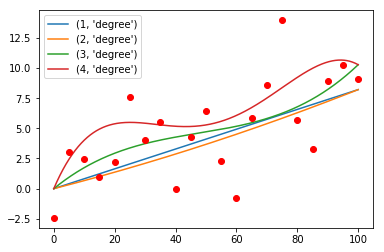

In [17]:
xy = np.genfromtxt('poly_fit_data.dat', delimiter=' ' )
x = xy[0]
y = xy[1]

def plot(x,y,N):
    yf = 0
    ye = 0
    e2 = 0
    q = 0
    z = np.polyfit(x,y,N)
    x2 = np.linspace(0,100,1000)
    for j in range(N):
        yf += z[j] * x2 ** N
        ye += z[j] * x ** N
        N = N -1
    
    for k in range(len(x)):
        e = (y[k]-ye[k])** 2
        e2 += e
        q +=1
    E = np.sqrt(e2/q)
    return x2, yf, E

for i in range (4):
    z = plot(x,y,i+1)
    plt.plot(z[0], z[1],label = (i + 1,'degree') );
    print('For the ',i+1, 'degree, the root mean square error is:', z[2])

plt.plot(xy[0], xy[1], 'ro');
plt.legend( loc='best');

### Question 2
The file `rotterdam_weather_2000_2010.csv` contains daily weather data at Rotterdam from 2000 through 2010. The column labeled `TG` contains the daily average temperature. Read the header of the `csv` file to understand the units. Determine and print to the screen the minimum and the maximum mean monthly temperature in degrees Celcius for the period 2000 - 2010 .

In [4]:
rot = read_csv('rotterdam_weather_2000_2010.csv', 
               skiprows=11, 
               skipinitialspace=True, 
               index_col=1,
               parse_dates=[1])
rot['temp'] = rot.TG / 10

avg = rot.temp.resample('M', kind='period').mean()
print('The maxiumum mean temprature is:',avg.max())
print('The minimum mean temprature is:',avg.min())

The maxiumum mean temprature is: 22.1612903226
The minimum mean temprature is: -0.364516129032


### Question 3
Write a function that draws $N$ ellipses on one graph. The center of all ellipses is at $(x,y)=(0,0)$, the width is 20 and the height is 1. The angle that the major axis makes with the horizontal varies from 0 degrees to 180 degrees with steps of 180/N degrees. The function takes as input argument the number $N$ and produces the figure. Demonstrate your function works by producing figures for $N=10$ and $N=20$.

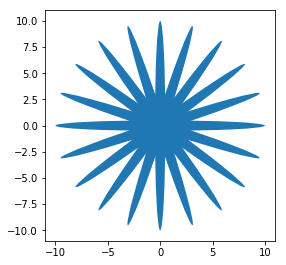

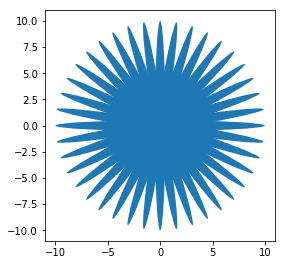

In [18]:
def el(N):
    fig = plt.figure()
    ax = fig.add_axes([.1, .1, .8, .8])
    tlist = []
    for i in range(N):
        E = Ellipse((0,0), width=20, height=1, angle=(180/N)*i)
        tlist.append(E)
    for j in range(len(tlist)):
        ax.add_patch(tlist[j])
    plt.axis('scaled')
    return


el(10)
el(20)

### Exercise 4
Five friends go shopping and buy the following fruit:

* Karel buys 2 pears, 10 strawberries, 3 apples and a kiwi. He has to pay €4,60.
* Daniel buys 5 strawberries, a pineapple and 2 kiwis. He has to pay €3,50.
* Sara buys 2 apples, a kiwi and 2 pineapples. She has to pay €4,70.
* Thomas buys a pear, an apple, 6 strawberries and a kiwi. He has to pay €2,52.
* Martha buys 20 strawberries, an apple and a pear. She has to pay €3,50.

They now want to know how much each piece of fruit costs.  Build a system of five equations and five unknowns and solve the system. Use a loopt to print to the screen the price of one piece of each of the five fruits with the corresponing fruit names.

In [6]:
E = np.array([[2, 10, 3, 1, 0],
              [0, 5, 0, 2, 1],
              [0, 0, 2, 1, 2],
              [1, 6, 1, 1, 0],
              [1, 20, 1, 0, 0]])
Einv = np.linalg.inv(E)
rhs = np.array([4.60, 3.50, 4.70, 2.52, 3.50])
sol = Einv @ rhs
names = ['pears', 'strawberry', 'apple', 'kiwi', 'pineapple']
for i in range(len(names)):
    print('', names[i],'cost', sol[i], 'euros')

 pears cost 0.6 euros
 strawberry cost 0.12 euros
 apple cost 0.5 euros
 kiwi cost 0.7 euros
 pineapple cost 1.5 euros


### Exercise 5. Find the bugs
The following code contains at least 4 bugs. Fix them such that a nice figure appears. 

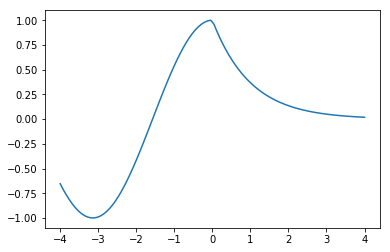

In [7]:
def func(x):
    '''
    y = cos(x) for x < 0
    y = exp(-x) for x > 0
    '''
    if (x < 0):
        y = np.cos(x)
    else:
        y = np.exp(-x) # np. niet vergeten
    return y  #return niet vergeten
    
x = np.linspace(-4, 4, 100)
y = np.zeros_like(x)

for i in range(len(x)): #len(x) niet vergeten
    y[i] = func(x[i]) #rechte haken ipv kromme haken

plt.plot(x, y);
